# Basic scripting with Julia

## Basic math

Let's just treat Julia as an unknown scripting language and see how far we get

In [1]:
a = 10

10

In [2]:
print(a)

10

In [3]:
print("I bought $a apples.\n")
print("I have ", a, " euros in my pocket.\n")

I bought 10 apples.
I have 10 euros in my pocket.


So far so good, what about a floating-point number?

In [4]:
b = 15.3

15.3

In [5]:
simple_sum = a+b

25.3

In [6]:
simple_math_function = exp(b)

4.4127118923504455e6

In [9]:
my_calculation = a + b * simple_math_function;
print("The output of my calculation is: ", my_calculation);
1+1

The output of my calculation is: 6.751450195296182e7

2

Take a look back at the lines above. The print statements appear as text. However the final result of calculations appears as a return value ('Out[ ]'). 

The ';' symbol is optional. It suppresses output. Normally, print statements and the final calculation in a code block lead to output in both the REPL and notebooks. However, general suppression of non-print( ) statements occurs in command-line executed programs.

In [10]:
@show sin(0.3)
@show tan(0.4)
@show tanh(0.2);


sin(0.3) = 0.29552020666133955
tan(0.4) = 0.4227932187381618
tanh(0.2) = 0.197375320224904


For quick debugging (and workshop demonstrating)
> @show variable

is a very useful macro for printing out a variable name and value pair

Try some other mathematical statements in the empty cells above.

## Variable assignments

We create variables using the typical assignment operator '='
Under the hood variables hold references to literals.

We can use functions to initialise variables

In [12]:
c = linspace(1,10,10)

10-element LinSpace{Float64}:
 1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0

Just like in Matlab, or in Numpy, we have a linspace( ) function.

In [13]:
typeof(c)

LinSpace{Float64}

> typeof(var)

tells us something about the type of a variable.

In [17]:
@show a, typeof(a)
b = 21
@show b, typeof(b)
b = 15.3
@show b, typeof(b);

(a,typeof(a)) = (10,Int64)
(b,typeof(b)) = (21,Int64)
(b,typeof(b)) = (15.3,Float64)


Notice the different types depending on the value stored in the variable.

Despite the fact that a few lines earlier b contained a floating-point value, when we assign it the value 21 it becomes an Int. This is because the reference is completely reassigned here, rather than accessing the value pointed to by the reference. We'll see more on this when we try to modify variables within functions. (Buzzwords: mutable and immutable).

In [20]:
c = 1:2:10

1:2:9

This is pretty typical Matlab notation when it comes to setting up loops. Here we can create a variable which 'steps'...

In [21]:
typeof(c)

StepRange{Int64,Int64}

Did you notice that we printed all of the elements of the LinSpace but here we just see the rules for the range? This is like a Generator in Python.

In [22]:
fieldnames(c)

3-element Array{Symbol,1}:
 :start
 :step 
 :stop 

Fieldnames( ) allows us to see what methods the variable makes available

In [37]:
c[3]

5

We can access the elements of c via matrix/vector notation. More of which later...

The built-in help is very useful and is accessed via '?'. Collect( ) allows us an easier access to the elements of c.

In [39]:
?collect

search: collect Collections



```
collect(element_type, collection)
```

Return an `Array` with the given element type of all items in a collection or iterable. The result has the same shape and number of dimensions as `collection`.

```
collect(collection)
```

Return an `Array` of all items in a collection or iterator. For associative collections, returns `Pair{KeyType, ValType}`. If the argument is array-like or is an iterator with the `HasShape()` trait, the result will have the same shape and number of dimensions as the argument.


In [40]:
d = collect(c)

5-element Array{Int64,1}:
 1
 3
 5
 7
 9

In [41]:
typeof(d)

Array{Int64,1}

Can you create a string in the empty cells?

What about adding a number to the string (concatenation), what happens?

## Arrays and basic linear algebra

In [42]:
f = ones(4)

4-element Array{Float64,1}:
 1.0
 1.0
 1.0
 1.0

In [43]:
A = rand(4,4)

4×4 Array{Float64,2}:
 0.019618  0.615169   0.0198152  0.89209 
 0.712973  0.566367   0.920378   0.014696
 0.360619  0.161122   0.81951    0.384117
 0.887168  0.0391966  0.939688   0.692809

In [44]:
A[1]

0.019618049035154073

**Note:** Array indexing is from 1, not from 0.

In [45]:
A[0]

LoadError: BoundsError: attempt to access 4×4 Array{Float64,2} at index [0]

In [46]:
A[1,2]

0.6151691048654198

In [47]:
A[end]

0.6928089033850939

The final element is 'end' (similar to matlab).

In [48]:
A[-1]

LoadError: BoundsError: attempt to access 4×4 Array{Float64,2} at index [-1]

Negative indexing does not exist.

In [49]:
A[1:2:end,1:2:end]

2×2 Array{Float64,2}:
 0.019618  0.0198152
 0.360619  0.81951  

Slicing and broadcasting do work.

In [54]:
X = Vector{Float64}(5)

5-element Array{Float64,1}:
 2.25987e-314
 2.28707e-314
 2.25838e-314
 2.25838e-314
 2.32017e-314

Create a length 5 Vector (dimension 1 array) of Float64's. Notice the type here is Array, we just used a helper function called Vector( ) to create it.

In [55]:
Y = Matrix{Float64}(4,2)

4×2 Array{Float64,2}:
 2.25841e-314  2.31949e-314
 2.32313e-314  2.25843e-314
 2.28979e-314  2.25838e-314
 2.31949e-314  2.25843e-314

Or a 4x2 Array of Float64's

In [56]:
Z = Array{Float64,1}

Array{Float64,1}

In some cases it can be useful to give a variable a type, without assigning any memory to it.

This becomes relevant when we're discussing speed later.

In [60]:
Z[1] = 1.

LoadError: MethodError: no method matching setindex!(::Type{Array{Float64,1}}, ::Float64, ::Int64)

In [61]:
@show size(X) size(Y) size(Z)

size(X) = (5,)
size(Y) = (4,2)


LoadError: MethodError: no method matching size(::Type{Array{Float64,1}})[0m
Closest candidates are:
  size{N}(::Any, [1m[31m::Integer[0m, [1m[31m::Integer[0m, [1m[31m::Integer...[0m) at abstractarray.jl:48
  size([1m[31m::BitArray{1}[0m) at bitarray.jl:39
  size([1m[31m::BitArray{1}[0m, [1m[31m::Any[0m) at bitarray.jl:43
  ...[0m

But as these two examples show, don't try accessing it!

In [62]:
Z = [1;2;3]

3-element Array{Int64,1}:
 1
 2
 3

Instead, assign the variable name to the new element(s) in memory when they are created.

In [63]:
W = Vector{Vector{Float64}}(3)
W[1] = [1;2;3]
W[2] = [1;2]
W[3] = [3;4;5]
@show W


W = Array{Float64,1}[[1.0,2.0,3.0],[1.0,2.0],[3.0,4.0,5.0]]


3-element Array{Array{Float64,1},1}:
 [1.0,2.0,3.0]
 [1.0,2.0]    
 [3.0,4.0,5.0]

Since you can have arrays of any types, you can have arrays of arrays.

In [64]:
V = W
V[1] = [1;4;5]
W

3-element Array{Array{Float64,1},1}:
 [1.0,4.0,5.0]
 [1.0,2.0]    
 [3.0,4.0,5.0]

Notice how the first row changed!

V is pointing to the same memory as W in this example. A similar assignment would have been
> V = copy(W)

In [65]:
V = deepcopy(W)
V[1] = [1;2;3]
W

3-element Array{Array{Float64,1},1}:
 [1.0,4.0,5.0]
 [1.0,2.0]    
 [3.0,4.0,5.0]

Some of you might have guessed that there's a deepcopy( ) function already. 

It creates a new space in memory, referenced by V, containing copies of all of the elements of W.

In [79]:
X = collect(1:5)

5-element Array{Int64,1}:
 1
 2
 3
 4
 5

We don't need the call to collect( ) here, it just helps for visualisation of the elements of the vector.

In [80]:
Y = eye(5)

5×5 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [81]:
X'*Y

1×5 Array{Float64,2}:
 1.0  2.0  3.0  4.0  5.0

The result of a vector times the identity matrix is the vector.

' is the transpose operator. There is also a function transpose( ).

In [84]:
Y[1,2] = 1
Y[2,1] = 1
Y

5×5 Array{Float64,2}:
 1.0  1.0  0.0  0.0  0.0
 1.0  1.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0  0.0  1.0

In [85]:
X'.*Y

5×5 Array{Float64,2}:
 1.0  2.0  0.0  0.0  0.0
 1.0  2.0  0.0  0.0  0.0
 0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  4.0  0.0
 0.0  0.0  0.0  0.0  5.0

Array notation is implicitly understood. Use the '.' for element-wise operations.

In [86]:
K = rand(5,1)

5×1 Array{Float64,2}:
 0.887609
 0.176807
 0.886503
 0.266665
 0.232511

Many mathematical functions have vector/matrix versions. Here we generate 5 random numbers.

In [87]:
idx = K .> 0.5

5×1 BitArray{2}:
  true
 false
  true
 false
 false

I can create a BitArray of which elements of the original matrix (element-wise!) fulfill a certain criterion.

In [88]:
K[K.>0.5]

2-element Array{Float64,1}:
 0.887609
 0.886503

If you only need access to the values, there's no need for the BitArray.

In [89]:
L = zeros(5,1);
L[idx] = 1
L

5×1 Array{Float64,2}:
 1.0
 0.0
 1.0
 0.0
 0.0

The BitArray is not necessarily great for mathematics, but it does allow us to select elements.

In summary
- arrays have extremely large syntactic scope
- have a wide range of slice notation, with notable exceptions from the world of Python ([-1])
- if you assume matlab-like notation it will typically work

## Flow of control

We can do various types of loops and all of the typical logical operations.

In [91]:
g = true

true

Boolean values are 'true' and 'false'

In [94]:
#g = true
while(g)
    a += 1;
    if (rand()<0.05)
        g = false;
        print("Setting g to false\n")
    end
    print(a,"\n");
end
print("Exited the while loop!\n")

52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
Setting g to false
70
Exited the while loop!


A while loop can be exited by changing the loop conditions, or via a break statement

In [96]:
g = true
while(g)
    a += 1;
    if (rand()<0.05)
        print("About to break!\n")
        break;
        print("This never occurs!\n")
    end
    print(a,"\n");
end
print("Done!\n")

77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
About to break!
Done!


Compare the two examples above. Why does the value of a get printed one last time in one, but not in the other?

In [97]:
for el in A
    print(el,"\n")
end

0.019618049035154073
0.7129726654612649
0.3606188695381607
0.8871678451782299
0.6151691048654198
0.5663667345468741
0.16112187094310637
0.039196620257692105
0.01981516568356101
0.9203781925742538
0.8195095605881264
0.9396884331738058
0.892090185400205
0.014695996684846113
0.38411713823195126
0.6928089033850939


Python style!

In [98]:
[print("",i,"\n") for i in 1:3];

1
2
3


In [99]:
B = [i + i*j for i=1:3, j=1:3]

3×3 Array{Int64,2}:
 2  3   4
 4  6   8
 6  9  12

Comprehensions '[ ]' allow us to construct arrays differently. We can also loop over multiple indices in a single line of code.

In [100]:
C = ones(3,3)
for i=1:3 ,j = 1:3
    C[i,j] = i + i*j
end

In [101]:
C

3×3 Array{Float64,2}:
 2.0  3.0   4.0
 4.0  6.0   8.0
 6.0  9.0  12.0

Notice how the elements of C are Float's but the elements of B are Ints? If you were a C programmer you would have to worry about this! Here it's irrelevant, type promotion will automatically convert variables if they are being used in a context which requires a different type.

In [102]:
change = [(q,d,n,p) for q=0:25:100 for d=0:10:100-q for n=0:5:100-q-d for p=100-q-d-n]

242-element Array{Tuple{Int64,Int64,Int64,Int64},1}:
 (0,0,0,100) 
 (0,0,5,95)  
 (0,0,10,90) 
 (0,0,15,85) 
 (0,0,20,80) 
 (0,0,25,75) 
 (0,0,30,70) 
 (0,0,35,65) 
 (0,0,40,60) 
 (0,0,45,55) 
 (0,0,50,50) 
 (0,0,55,45) 
 (0,0,60,40) 
 ⋮           
 (75,0,5,20) 
 (75,0,10,15)
 (75,0,15,10)
 (75,0,20,5) 
 (75,0,25,0) 
 (75,10,0,15)
 (75,10,5,10)
 (75,10,10,5)
 (75,10,15,0)
 (75,20,0,5) 
 (75,20,5,0) 
 (100,0,0,0) 

Let's go really crazy! I took this example from the Julia language announcements blog.

Three things to note
1. Tupples exist, and sometimes are a good thing.
2. The ability to put as many terms, of many different types, inside the comprehension.
3. The order of processing of the rules in the comprehension (last to first, like nested loops)

In [103]:
extrema([sum(t) for t in change])

(100,100)

We can even embed a comprehension inside a function call.

In [104]:
print("before ",d)

for i=1:length(d)
    d[i] += (i % 3)
end

print("\nafter  ",d)

before [1,3,5,7,9]
after  [2,5,5,8,11]

Ok, we're just being contrary by putting the for loop last. It's there. It works as you might expect.

Any looping or logic questions?

- ( boolean ? true : false) ternary operator
- elseif ...
- there is no 'do' loop

## Functions

In [107]:
# this is a comment, let's make a function
function foo(bb)
    print("Inside the generic function foo()\n")
    print("Argument value = ",bb,"\n")
end

foo (generic function with 1 method)

I can declare a function. As in python, I don't need to worry about types if I don't want to.

In [108]:
@show a
foo(a)

a = 101
Inside the generic function foo()
Argument value = 101


In [109]:
typeof(a)

Int64

In [110]:
# let's make a function that takes floats only
function foo(bb::Float64)
    print("I'm still inside foo() but that was a float!\n");
    print("Argument value = ",bb,"\n");
end

foo (generic function with 2 methods)

This is your first overt experience of programming for multiple dispatch! We'll do more below.

In [111]:
?print # there is an online help system

search: print println print_joined print_escaped print_shortest print_unescaped



```
print(x)
```

Write (to the default output stream) a canonical (un-decorated) text representation of a value if there is one, otherwise call `show`. The representation used by `print` includes minimal formatting and tries to avoid Julia-specific details.


In [112]:
?foo

search: floor pointer_from_objref OverflowError RoundFromZero FileMonitor



No documentation found.

`foo` is a `Function`.

```
# 2 methods for generic function "foo":
foo(bb::Float64) at In[110]:3
foo(bb) at In[107]:3
```


In [113]:
print("First call foo() on a=$a \n") 
foo(a)
print("\nNow with a float, b=$b\n")
foo(b)

First call foo() on a=101 
Inside the generic function foo()
Argument value = 101

Now with a float, b=15.3
I'm still inside foo() but that was a float!
Argument value = 15.3


In [114]:
foo("this is a string")

Inside the generic function foo()
Argument value = this is a string


In fact, the not Float64 version of foo( ) can handle pretty much any variable which we throw at it.

**Technical:** Functions are pass by reference, which makes calls almost cost-free, but it means that (_immutable_) variables changed
within a function don't maintain the changes upon function exit.

Arrays however contain references to their base variables within them, and so the pattern of access dictates whether those base value changes are maintained or not.

In [128]:
function bar(d)
    print("Upon entering function ",d,"\n");
    d += 45;
    print("Leaving function ",d,"\n");
end

bar (generic function with 2 methods)

In [129]:
print(a,"\n")
bar(a)
print(a,"\n")

101
Upon entering function 101
Leaving function 146
101


In [130]:
print(d,"\n") # d was a vector I defined at the top of the worksheet, I subsequently modified it via my for loop
bar(d)
print(d,"\n")

[47,50,50,53,56]
Upon entering function [47,50,50,53,56]
Leaving function [92,95,95,98,101]
[47,50,50,53,56]


Did you notice the operation on the entire vector?

Two things to notice
- d += 45 operated across the vector elements
- despite the fact that I could modify the elements in the looping section above, here they were not persistently modified

In [131]:
# now if we change how the matrix elements are accessed within the function
function bar2(d)
    print("Upon entering function bar2 ",d,"\n");
    for i=1:length(d)
        d[i] += 45;
    end
    print("Leaving function ",d,"\n");
end

bar2 (generic function with 1 method)

So let's take the lesson from the for loop and use it here to access the individual elements.

In [132]:
print(d,"\n")
bar2(d)
print(d,"\n")

[47,50,50,53,56]
Upon entering function bar2 [47,50,50,53,56]
Leaving function [92,95,95,98,101]
[92,95,95,98,101]


In [133]:
function bar(d::Array{Float64,1})
    print("I'm in the Float64 version of bar()\n")
    bar2(d);
end

bar (generic function with 2 methods)

I'm writing bar2( ) as a separate function. I could have just written it's contents into this version of bar( ). The reason for the separation here is purely didactic.

In [134]:
methods(bar)

# 2 methods for generic function "bar":
bar(d::Array{Float64,1}) at In[133]:2
bar(d) at In[128]:2

In [135]:
methods(bar2)

# 1 method for generic function "bar2":
bar2(d) at In[131]:3

In [136]:
print(a,"\n")
bar(a)
print(a,"\n")

101
Upon entering function 101
Leaving function 146
101


In [137]:
print(d,"\n")
bar(d)
print(d,"\n")

[92,95,95,98,101]
Upon entering function [92,95,95,98,101]
Leaving function [137,140,140,143,146]
[92,95,95,98,101]


Wait, why didn't bar2( ) deal with our data?

In [138]:
typeof(d)

Array{Int64,1}

It always pays to check your types (when you start playing with types).

In [141]:
function bar(d::Array{Int,1})
    print("I handle Ints and call bar2() on them\n")
    bar2(d);
end

bar (generic function with 3 methods)

In [142]:
bar(d)

I handle Ints and call bar2() on them
Upon entering function bar2 [137,140,140,143,146]
Leaving function [182,185,185,188,191]


In [143]:
methods(bar)

# 3 methods for generic function "bar":
bar(d::Array{Int64,1}) at In[141]:2
bar(d::Array{Float64,1}) at In[133]:2
bar(d) at In[128]:2

In [144]:
d

5-element Array{Int64,1}:
 182
 185
 185
 188
 191

## Calling a Python library function

Visualisation and calling a Python Library

In [ ]:
using PyPlot

In [ ]:
x = linspace(-2π,2π,101);
y = sin(x);

In [ ]:
@show x y

In [ ]:
plot(x,y,"r",linewidth=2)
axis([-7,7,-1.1,1.1])

PyPlot uses PyCall to access any installed Python packages. The above is equivalent to the following in PyCall:

In [175]:
using PyCall

In [176]:
@pyimport matplotlib.pyplot as mplot

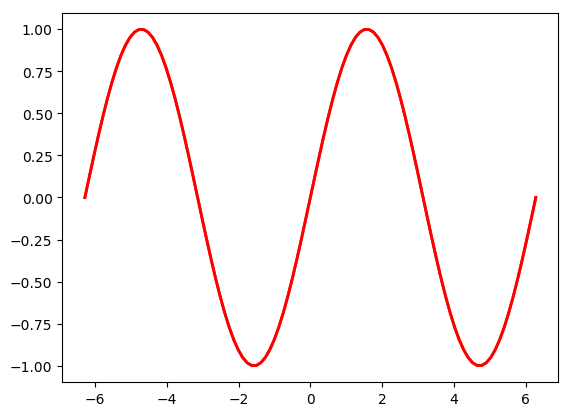

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x3260c8e50>

In [180]:
mplot.plot(x, y, color="red", linewidth=2.0)

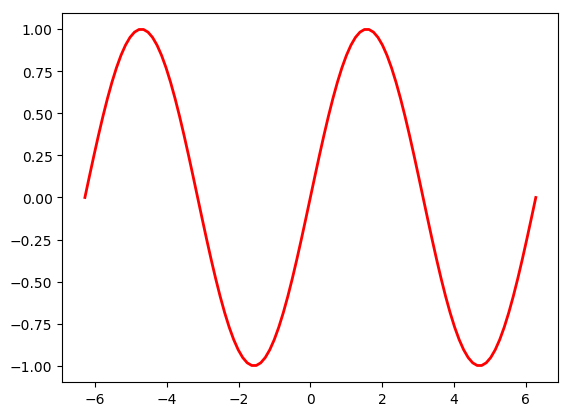

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x322480bd0>

In [189]:
myfig = mplot.figure(1)
mplot.plot(x, y, color=:red, linewidth=2.0)

The biggest difference from Python is that object attributes/members are accessed with o[:attribute] rather than o.attribute, so that o.method(...) in Python is replaced by o\[:method\](...) in Julia.

# Moving from other languages

1. Base index of array is 1
2. Almost any version of a generator exists, they're all fast
3. Whitespace doesn't matter (nor does indentation)
4. Use of END keyword
5. Column-wise memory layout

https://cheatsheets.quantecon.org/

https://docs.julialang.org/en/release-0.5/manual/noteworthy-differences/

# Deeper into Julia

## The help system

In [ ]:
?copy

In [ ]:
methods(copy)

In [ ]:
fieldnames(LinSpace)

In [245]:
@which copy(A)

copy{T<:Array{T,N}}(a::T) at array.jl:70

## Defining your own types

## Multiple dispatch

## Code introspection - llvm

Code introspection

In [ ]:
function goo(a)
    print("In generic function goo\n");
    a += 1;
end

In [ ]:
@code_lowered goo(1)

In [ ]:
@code_lowered goo(1.0)

In [ ]:
@code_typed goo(1)

In [ ]:
@code_native goo(1)

## Macros

## Lambda expressions

# Move on to the Package environment